In [1]:
#Importing all the important modules.
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#download stopwords from nltk
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Navaneeth Gowda
[nltk_data]     T\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [3]:
#Reading the csv file.
df=pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1')

In [7]:
#The size of the file.
df.shape

(1599999, 6)

In [9]:
#Representation of the file in rows and columns.
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [11]:
#Changing the columns of the file.
column_names=['target', 'id', 'date', 'flag', 'user', 'text']
df=pd.read_csv("training.1600000.processed.noemoticon.csv", names=column_names, encoding='ISO-8859-1')

In [12]:
df.shape

(1600000, 6)

In [13]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
#Checking the missing values in the dataset
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [16]:
#checking the distribution of target column
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [17]:
#replacing the target id 4 with 1.
df.replace({'target':{4:1}}, inplace=True)

In [18]:
#The target divided into number of positive and negative.
df['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [19]:
# 0 indicates negative tweet
# 1 indicates positive tweet
port_stem=PorterStemmer()

In [22]:
#Function for stemming the text from file and user.
def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ', content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    
    return stemmed_content


In [23]:
#Creating a column named Stemmed_content and storing the stemmed values in that column.
df['stemmed_content']=df['text'].apply(stemming)

In [25]:
df.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [26]:
#Printing the stemmed_content.
print(df['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [27]:
print(df['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [28]:
#Separating the data and label
X=df['stemmed_content'].values
Y=df['target'].values

In [29]:
#Printing the stemmed content.
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [30]:
#Printing the target.
print(Y)

[0 0 0 ... 1 1 1]


In [31]:
#Splitting the data to training Data and test Data

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1280000,) (320000,)


In [33]:
#Printing the Training content.
print(X_train)

['paisleypaisley lol get idea far advanc even june yet need third knitter summer group'
 'worst headach ever'
 'ewaniesciuszko sad wont see miss alreadi yeah perfect come back th' ...
 'got home meet talk endlessli one coolest guy ever met smile'
 'bought chocol bar quot win free bar quot label win either'
 'misecia said hope dm email sunday']


In [34]:
print(X_test)

['stm denali ye black red fav color realli want color def look awesom jare'
 'qu buy open hous weekend pm best valu one bedroom lic long island citi bd http tinyurl com pt nqd'
 'ginoandfran fran greet air okay hahahaha thank' ...
 'la brat follow also hope atleast get also wish get well soon'
 'feel like decent swell sinc last fall hope wave myrtl beach week either least golf'
 'relaxin busi day']


In [35]:
#converting the text data to numerical data
vectorizer=TfidfVectorizer()

X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [36]:
print(X_train)

  (0, 154767)	0.2697660704325824
  (0, 388138)	0.20555120011808467
  (0, 220296)	0.4301567790762487
  (0, 406297)	0.2978221095272138
  (0, 286478)	0.16123218610004275
  (0, 454381)	0.20169626473577718
  (0, 205794)	0.2414022906380175
  (0, 124524)	0.18318401951949756
  (0, 4832)	0.31707426786115905
  (0, 128605)	0.22108856600702775
  (0, 175252)	0.22407080547034602
  (0, 146067)	0.12929728405657018
  (0, 239679)	0.15130037108228483
  (0, 307108)	0.4620604881532448
  (1, 124611)	0.5113765148324884
  (1, 161801)	0.5778049407933611
  (1, 445870)	0.6361096685891185
  (2, 400192)	0.2722541116865256
  (2, 31063)	0.1936303169258752
  (2, 78861)	0.21039643874061958
  (2, 312657)	0.3154702974657607
  (2, 453420)	0.2347069337186747
  (2, 12436)	0.2529872032123258
  (2, 267649)	0.19309660201644555
  (2, 358186)	0.19837942712286838
  :	:
  (1279997, 120136)	0.5183864288132355
  (1279997, 80839)	0.4085075096529922
  (1279997, 262076)	0.3257051331036561
  (1279997, 372797)	0.3021907911926725
  (1279

In [37]:
print(X_test)

  (0, 453357)	0.1781708363247895
  (0, 435956)	0.14183025329879742
  (0, 384697)	0.3281164007446601
  (0, 335577)	0.22602158147814247
  (0, 334643)	0.14719329779308424
  (0, 240451)	0.15341308097014625
  (0, 189057)	0.31324918577405797
  (0, 129417)	0.25650960779862714
  (0, 97585)	0.4019235611854435
  (0, 96399)	0.255967788489452
  (0, 78636)	0.5158100011206617
  (0, 43712)	0.23562815302828183
  (0, 28874)	0.1778395103911245
  (1, 438137)	0.16390196841168053
  (1, 428475)	0.2850923429146983
  (1, 409742)	0.19539196331452124
  (1, 328541)	0.30370566878650734
  (1, 325414)	0.2832875855026037
  (1, 318909)	0.20246938925608493
  (1, 303003)	0.19949441578138133
  (1, 301683)	0.13212235134015302
  (1, 240223)	0.1674195650536303
  (1, 233854)	0.3852709938491561
  (1, 183279)	0.24586158827112847
  (1, 171245)	0.12468774856570086
  :	:
  (319997, 225096)	0.2933179603743362
  (319997, 169469)	0.19450444826456267
  (319997, 146067)	0.3148589224636577
  (319997, 135536)	0.2180996497753238
  (3199

In [39]:
#Importing Multinomial Naive Bayes model.
from sklearn.naive_bayes import MultinomialNB

In [41]:
#Storing the MNB in a variable named mode.
model=MultinomialNB()

In [43]:
#This train the MNB model.
model.fit(X_train, Y_train)

MultinomialNB()

In [44]:
X_train_predict=model.predict(X_train)
accuracy=accuracy_score(Y_train, X_train_predict)

In [45]:
#Accuracy of the trained model.
accuracy

0.82031484375

In [47]:
X_test_predict=model.predict(X_test)
accuracy1=accuracy_score(Y_test, X_test_predict)

In [48]:
accuracy1

0.755515625

In [49]:
#Function to stem and process the input keyword taken from the user.
def predict_sentiment(user_input):
    # Preprocess the user input
    stemmed_input = stemming(user_input)
    # Convert the preprocessed input to a format compatible with the model
    processed_input = vectorizer.transform([stemmed_input])
    # Use the model to predict the sentiment of the user input
    sentiment_prediction = model.predict(processed_input)
    return sentiment_prediction[0]

In [148]:
# 0 is negative.
# 1 is positive.
#This is where the user gives in the input.
user_input = input("Please enter a sentence: ")
print(predict_sentiment(user_input))

Please enter a sentence:  insanity


0


In [61]:
#Importing the pickle for saving trained model.
import pickle

In [62]:
#Using dump() function in pickle to save trained model.
filename='trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [63]:
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav', 'rb'))

In [66]:
X_new=X_test[100]
print(Y_test[100])

prediction=model.predict(X_new)
print(prediction)

if(prediction[0]==0):
    print('Negative Tweet')

else:
    print('Positive Tweet')

1
[1]
Positive Tweet


In [112]:
#Using dump() function to save the vectorizer(Tfidfvectorizer).
pickle.dump(vectorizer, open("vectorizer_pickle.sav", 'wb'))

In [113]:
pickle.dump(stemming, open("stemming_pickle.sav", 'wb'))

In [114]:
#Imported matplotlib.pyplot for visualization purposes.
import matplotlib.pyplot as plt

In [115]:
sentiment_counts = df['target'].value_counts()

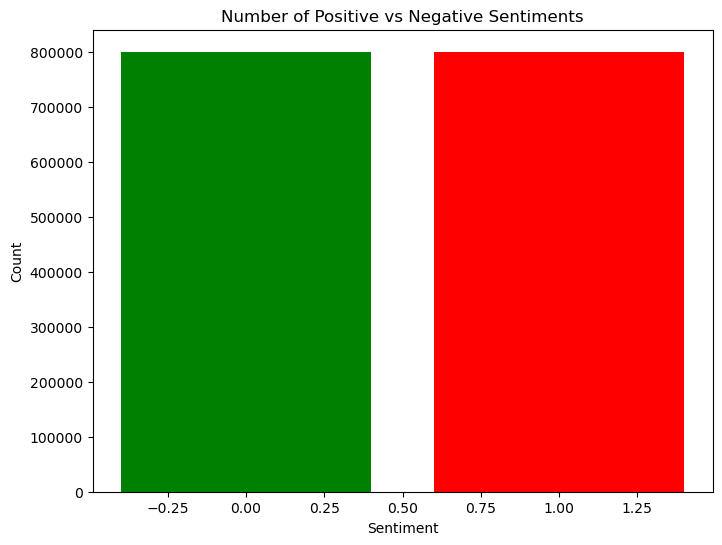

In [117]:
#Bar graph to denote the number of positive and negative sentiments in the used csv dataset.
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.title('Number of Positive vs Negative Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

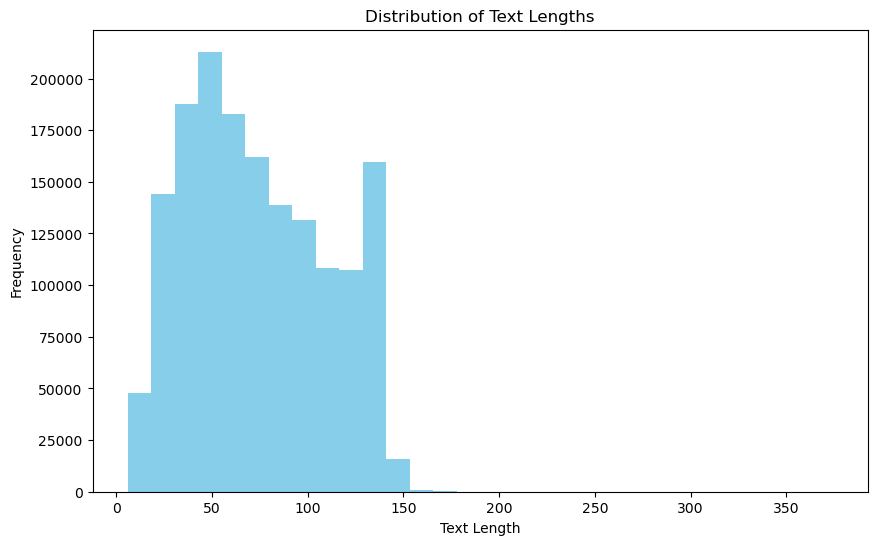

In [120]:
# This histogram is used to represent the frequency of text.
plt.figure(figsize=(10, 6))
plt.hist(df['text'].str.len(), bins=30, color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()
